----------------------------------
       1.Data Selection           
----------------------------------

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwe

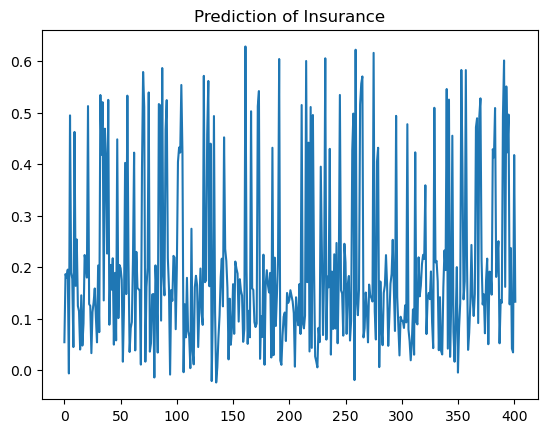

--------------------------------------------
 Prediction (Medical Insurance ) 
--------------------------------------------


[0] The Charges of medical insurance = 0.054391920933486826

[1] The Charges of medical insurance = 0.18653923366100567

[2] The Charges of medical insurance = 0.1794155242693237

[3] The Charges of medical insurance = 0.19523462209102904

[4] The Charges of medical insurance = -0.006210897880518131

[5] The Charges of medical insurance = 0.49451643241759313

[6] The Charges of medical insurance = 0.18979441359984364

[7] The Charges of medical insurance = 0.17732125297678797

[8] The Charges of medical insurance = 0.0449734639098851

[9] The Charges of medical insurance = 0.4624335929071436


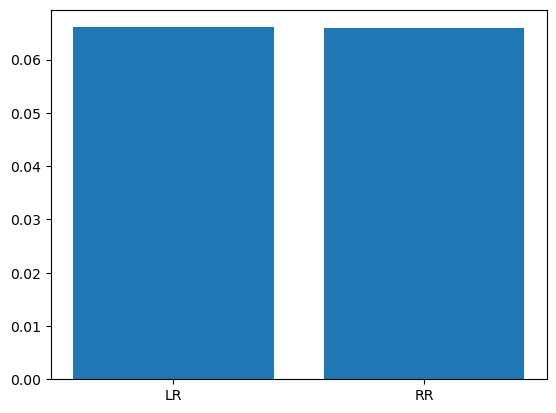

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("medical_cost_insurance.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))

#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("    Before Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()

#===  LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("---------------------------------")
print(" Before label encoding ")
print("---------------------------------")
print()
print(data_frame['sex'].head(10))

data_frame['sex']=label_encoder.fit_transform(data_frame['sex'])
data_frame['smoker']=label_encoder.fit_transform(data_frame['smoker'])
data_frame['region']=label_encoder.fit_transform(data_frame['region'])


print("-------------------------------------------")
print(" After label Encoding ")
print("------------------------------------------")
print()

print(data_frame['sex'].head(20))

#========================== NORMALIZATION   =============================

#===== MIN MAX SCALAR ======

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_frame = scaler.fit_transform(data_frame)

data_frame=pd.DataFrame(data_frame)

#=============================== 3. DATA SPLITTING ============================

X=data_frame.iloc[:,:-1].values
y=data_frame.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("-------------------------------------------")
print(" Data Splitting ")
print("-------------------------------------------")
print()
print("Total No.of data's in dataset  : ", data_frame.shape[0])
print()
print("Total No.of training data's   : ", X_train.shape[0])
print()
print("Total No.of testing data's    : ", X_test.shape[0])


#============================  CLASSIFICATION =============================

# ========== LINEAR REGRESSION =========

from sklearn import datasets, linear_model, metrics
import numpy as np

# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

prd_lr=reg.predict(X_test)

print("-------------------------------------------")
print(" Linear Regression")
print("-------------------------------------------")
print()

Score_1=metrics.mean_absolute_error(y_test, prd_lr)
#Accuracy_1=100-Score_1
print('Mean Absolute Error:', Score_1)  
print()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prd_lr))  
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prd_lr))) 
print()


# # ========== RIDGE REGRESSION =========

rr = linear_model.Ridge()
  
# train the model using the training sets
rr.fit(X_train, y_train)

prd_rr=rr.predict(X_test)

print("-----------------------------------")
print(" Ridge Regression")
print("-----------------------------------")
print()

Score_rr=metrics.mean_absolute_error(y_test, prd_rr)
#Accuracy_1=100-Score_1
print('Mean Absolute Error:', Score_rr)  
print()
mse_rr=metrics.mean_squared_error(y_test, prd_rr)
print('Mean Squared Error:', mse_rr)  
print()
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prd_rr))) 
print()



plt.title("Prediction of Insurance")
plt.plot(prd_rr) 
plt.show() 


#========================   PREDICTION  ========================

print("--------------------------------------------")
print(" Prediction (Medical Insurance ) ")
print("--------------------------------------------")
print()

for i in range(0,10):
    print("============================")
    print()
    print([i],"The Charges of medical insurance =",prd_rr[i])


# ===== COMPARISON =====

vals=[Score_1,Score_rr]
inds=range(len(vals))
labels=["LR","RR"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()
